## Цель работы:

Изучение алгоритмов и методов классификации на практике

**Вариант:** 16 (1 вариант medical_diagnosis)

Данные содержат информацию о болезнях:

- age — возраст пациента (лет), числовой.
- sex — пол: Male / Female, категориальный.
- BMI — индекс массы тела (кг/м²), числовой.
- systolic_bp — систолическое артериальное давление, мм рт. ст., числовой.
- cholesterol_mg_dl — общий холестерин сыворотки, мг/дл, числовой.
- fasting_glucose_mg_dl — глюкоза крови натощак, мг/дл, числовой.
- smoking_status — статус курения: Never / Former / Current, категориальный.
- family_history — наследственность по заболеванию: Yes / No, категориальный.
- activity_level — уровень физической активности: Low / Moderate / High,
- категориальный.
- symptom_score — суммарная выраженность симптомов (0–10), числовой.
- CRP_mg_L — C-реактивный белок, мг/л (маркер воспаления), числовой.
- WBC_10e9_L — лейкоциты, ×10⁹/л, числовой.
- ECG_result — результат ЭКГ: Normal / ST-T abnormality / LVH, категориальный.
- Disease — целевой класс: 1 — болеет, 0 — не болеет.


### Импорт библиотек

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,    
    roc_auc_score
)


## Ход работы

### Обработка данных

Были просмотрены основные данные о датасете

In [3]:
df = pd.read_csv('medical_diagnosis.csv')

display(df.head(10))
df.info()
df.describe()

,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
0,34,Male,16.8,132.0,196.0,78.0,Current,No,High,0.2,0.58,8.60,Normal,0
1,24,Female,29.2,118.0,182.0,96.0,Current,No,Moderate,3.2,2.72,6.54,Normal,0
2,19,Female,16.5,121.0,268.0,101.0,Current,No,Moderate,3.8,0.18,6.61,Normal,0
3,89,Female,15.4,117.0,136.0,96.0,Never,No,Low,2.6,1.83,5.67,Normal,0
4,66,Male,16.7,82.0,241.0,126.0,Former,No,Moderate,3.5,1.16,2.66,Normal,0
5,43,Male,13.5,136.0,171.0,91.0,Never,No,Low,1.3,0.10,5.05,ST-T abnormality,0
6,76,Female,26.2,110.0,269.0,140.0,Current,Yes,Moderate,2.7,2.92,7.91,ST-T abnormality,0
7,24,Female,30.0,162.0,189.0,112.0,Never,Yes,High,2.1,0.80,7.71,LVH,0
8,83,Male,25.7,107.0,215.0,110.0,Never,No,Moderate,2.7,2.60,9.17,Normal,0
9,41,Female,21.5,156.0,188.0,120.0,Never,No,High,1.1,0.10,10.15,Normal,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3031 non-null   int64  
 1   sex                    3031 non-null   object 
 2   BMI                    3031 non-null   float64
 3   systolic_bp            3031 non-null   float64
 4   cholesterol_mg_dl      3031 non-null   float64
 5   fasting_glucose_mg_dl  3031 non-null   float64
 6   smoking_status         3031 non-null   object 
 7   family_history         3031 non-null   object 
 8   activity_level         3031 non-null   object 
 9   symptom_score          3031 non-null   float64
 10  CRP_mg_L               3031 non-null   float64
 11  WBC_10e9_L             3031 non-null   float64
 12  ECG_result             3031 non-null   object 
 13  Disease                3031 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 331.6+ 

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,53.176509,26.465886,122.417684,202.744903,94.366216,2.040185,1.380625,6.825094,0.016166
std,20.740090,5.869822,17.859825,53.735636,19.547096,1.357714,3.159757,1.980929,0.126136
min,18.000000,13.500000,82.000000,85.000000,56.000000,0.000000,0.100000,2.300000,0.000000
25%,35.000000,22.500000,110.000000,171.000000,80.500000,1.000000,0.100000,5.480000,0.000000
50%,53.000000,26.300000,122.000000,200.000000,94.000000,2.000000,0.520000,6.750000,0.000000
75%,71.000000,30.400000,134.000000,232.000000,107.000000,3.000000,1.460000,8.150000,0.000000
max,89.000000,50.900000,184.000000,658.200000,163.000000,6.800000,43.450000,13.720000,1.000000


In [4]:
df.isna().sum()

age                      0
sex                      0
BMI                      0
systolic_bp              0
cholesterol_mg_dl        0
fasting_glucose_mg_dl    0
smoking_status           0
family_history           0
activity_level           0
symptom_score            0
CRP_mg_L                 0
WBC_10e9_L               0
ECG_result               0
Disease                  0
dtype: int64

Пустых объектов не было найдено

In [5]:
cat_cols = ['sex', 'smoking_status', 'family_history', 'activity_level', 'ECG_result']

for col in cat_cols:
    print(col, df[col].unique())


sex ['Male' 'Female']
smoking_status ['Current' 'Never' 'Former']
family_history ['No' 'Yes']
activity_level ['High' 'Moderate' 'Low']
ECG_result ['Normal' 'ST-T abnormality' 'LVH']


Переменные в столбах корректны

---

Для начала были созданы списки с числовыми и категориальными данными для дальнейшей более простой работы с ними.

In [6]:
numeric_cols = ['age', 'BMI', 'systolic_bp', 'cholesterol_mg_dl', 'fasting_glucose_mg_dl',
            'symptom_score', 'CRP_mg_L', 'WBC_10e9_L']
categorical_cols = ['sex', 'smoking_status', 'family_history', 'activity_level', 'ECG_result']

Выделение целевой переменной

<Figure size 2000x1400 with 0 Axes>

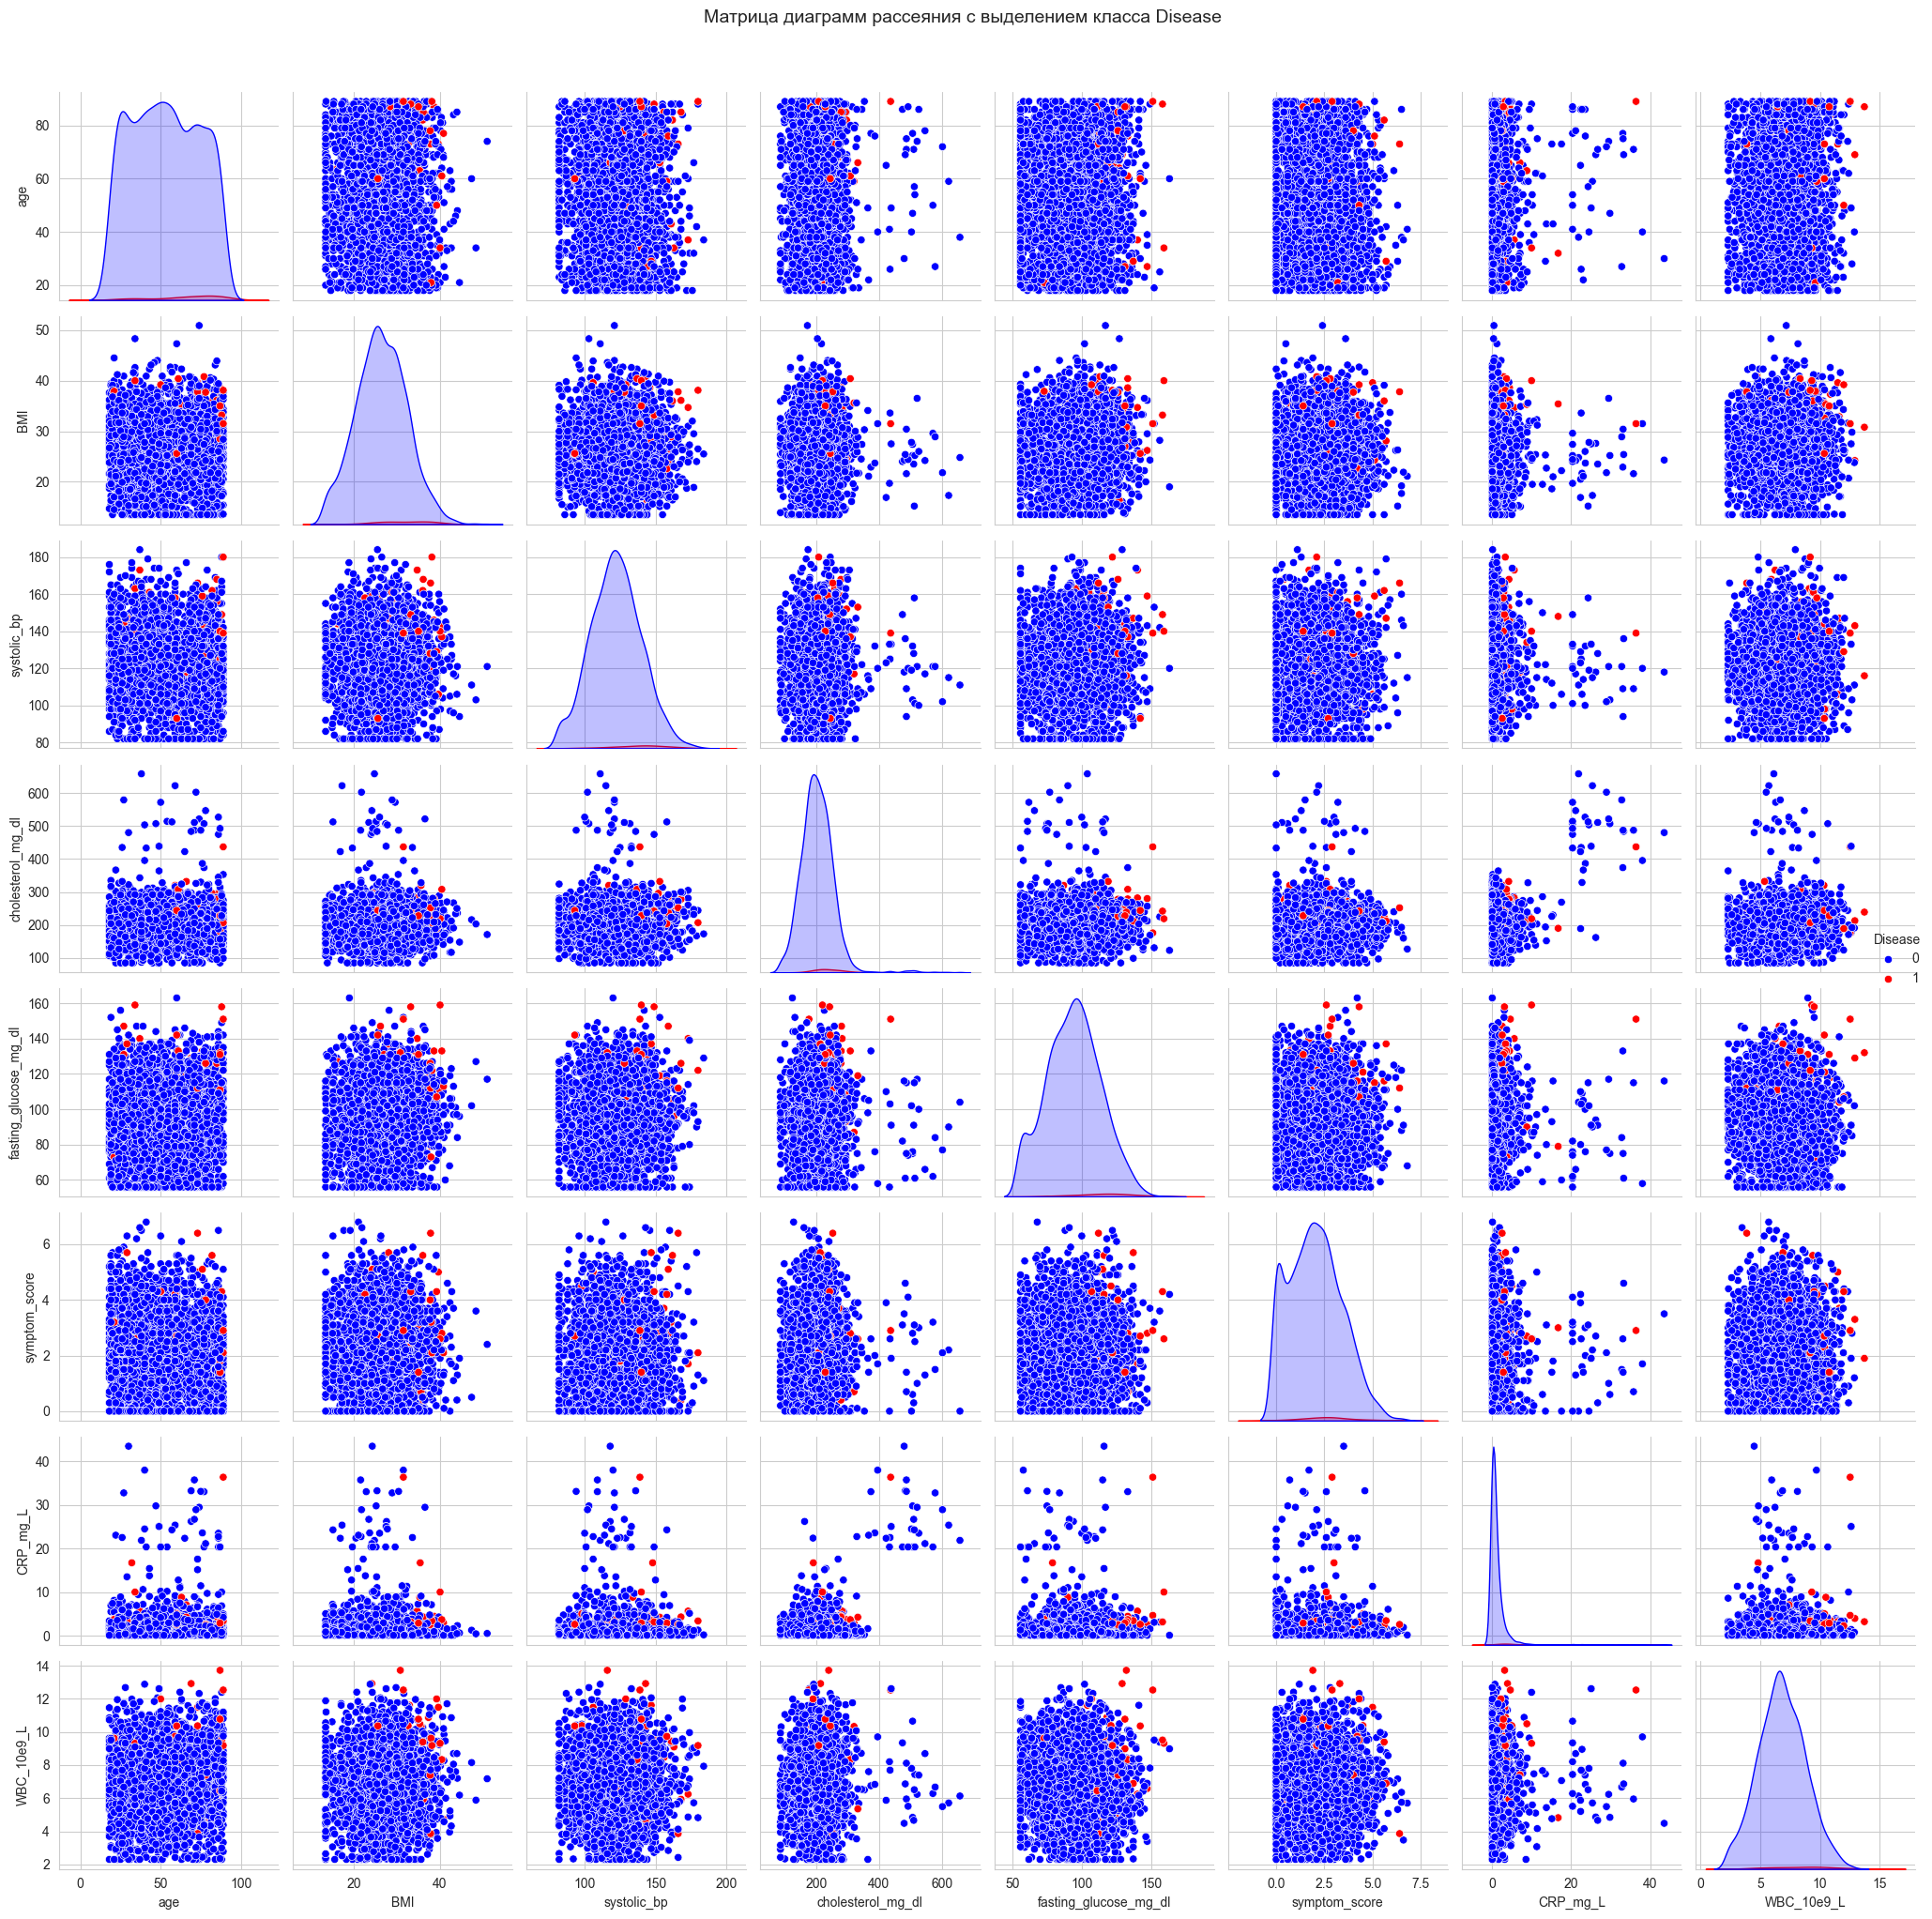

In [7]:
df_without_feature = df.drop(columns=["Disease"])

plt.figure(figsize=(20,14))
sns.set_style("whitegrid")
sns.pairplot(df[numeric_cols + ["Disease"]], hue="Disease",  palette={0: 'blue', 1: 'red'}, diag_kind="kde")
plt.suptitle("Матрица диаграмм рассеяния с выделением класса Disease", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


В ходе анализа графиков оказалось, что особой связи между признаками не наблюдается.

Затем было проведено преобразование категориальных признаков в числовые.

In [8]:
df_dumb = pd.get_dummies(df_without_feature, columns=categorical_cols, drop_first=True)

Была проведена стандартизация данных.

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dumb)
scaled_df = pd.DataFrame(scaled_data, columns=df_dumb.columns)
display(scaled_df.head(10))

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,sex_Male,smoking_status_Former,smoking_status_Never,family_history_Yes,activity_level_Low,activity_level_Moderate,ECG_result_Normal,ECG_result_ST-T abnormality
0,-0.924763,-1.646980,0.536618,-0.125541,-0.837409,-1.355579,-0.253424,0.896145,0.993095,-0.661707,-1.016299,-0.712713,-0.728035,-0.908187,0.521977,-0.460869
1,-1.407001,0.465868,-0.247394,-0.386119,0.083596,0.854382,0.423955,-0.143943,-1.006953,-0.661707,-1.016299,-0.712713,-0.728035,1.101094,0.521977,-0.460869
2,-1.648120,-1.698097,-0.079391,1.214573,0.339430,1.296374,-0.380037,-0.108600,-1.006953,-0.661707,-1.016299,-0.712713,-0.728035,1.101094,0.521977,-0.460869
3,1.727543,-1.885528,-0.303395,-1.242303,0.083596,0.412390,0.142242,-0.583203,-1.006953,-0.661707,0.983962,-0.712713,1.373560,-0.908187,0.521977,-0.460869
4,0.618397,-1.664019,-2.263424,0.712030,1.618604,1.075378,-0.069835,-2.102943,0.993095,1.511244,-1.016299,-0.712713,-0.728035,1.101094,0.521977,-0.460869
5,-0.490749,-2.209270,0.760621,-0.590858,-0.172239,-0.545260,-0.405359,-0.896240,0.993095,-0.661707,0.983962,-0.712713,1.373560,-0.908187,-1.915793,2.169815
6,1.100634,-0.045305,-0.695401,1.233186,2.334941,0.486055,0.487262,0.547766,-1.006953,-0.661707,-1.016299,1.403089,-0.728035,1.101094,-1.915793,2.169815
7,-1.407001,0.602181,2.216643,-0.255830,0.902267,0.044063,-0.183787,0.446786,-1.006953,-0.661707,0.983962,1.403089,-0.728035,-0.908187,-1.915793,-0.460869
8,1.438201,-0.130500,-0.863403,0.228100,0.799933,0.486055,0.385972,1.183936,0.993095,-0.661707,0.983962,-0.712713,-0.728035,1.101094,0.521977,-0.460869
9,-0.587197,-0.846142,1.880638,-0.274442,1.311602,-0.692590,-0.405359,1.678735,-1.006953,-0.661707,0.983962,-0.712713,-0.728035,-0.908187,0.521977,-0.460869


Набор данных был разбит на тренировочной и тестовый датасеты

In [10]:
y = df["Disease"]

X = scaled_df

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        
    random_state=0,     
    stratify=y)            

print("Размеры выборок:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Размеры выборок:
X_train: (2424, 16)
X_test: (607, 16)
y_train: (2424,)
y_test: (607,)


---

Далее в каждом методе будут рассмотрены следующие метрики:
- `Accuracy` - доля всех правильных предсказаний среди всех объектов. Хорошо работает при равных классах, но вводит в заблуждение при дисбалансе.

- `Precision` - показывает, какая часть предсказанных моделью положительных объектов действительно является положительной. Характеризует «точность» положительных срабатываний, важна при высокой цене ложных тревог.

- `Recall` - доля найденных моделью положительных объектов среди всех реальных положительных примеров. Характеризует способность обнаруживать целевой класс, важен при высокой цене пропусков.

- `Balanced Accuracy` - среднее между чувствительностью и специфичностью. Учитывает дисбаланс классов и показывает, насколько модель хорошо распознаёт оба класса.

- `F1 score` - гармоническое среднее Precision и Recall. Используется, когда важно учитывать и точность, и полноту, особенно при несбалансированных данных.

### Метод k- ближайших соседей

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_probabilities = knn_model.predict_proba(X_test)

print(f"KNN обучен (n_neighbors = {knn_model.n_neighbors})")

KNN обучен (n_neighbors = 5)


Метрики

In [12]:
accuracy = accuracy_score(y_test, knn_predictions)
precision = precision_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions)
balanced_acc = balanced_accuracy_score(y_test, knn_predictions)
f1 = f1_score(y_test, knn_predictions)

print("Метрики классификации для KNN:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"F1 score: {f1:.4f}")

Метрики классификации для KNN:
Accuracy: 0.9835
Precision: 0.0000
Recall: 0.0000
Balanced Accuracy: 0.5000
F1 score: 0.0000


c:\Users\kitte\OneDrive\Рабочий стол\Jupiter NoteBook\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


- `Accuracy` = 0.9835 выглядит высокой, но в контексте остальных метрик она вводит в заблуждение. Это почти наверняка результат сильного дисбаланса классов, когда модель предсказывает только самый частый класс.

- `Precision` = 0.0, `Recall` = 0.0, `F1` = 0.0 — это означает, что модель ни разу не предсказала положительный класс (или предсказывала, но всегда ошибалась). Фактически модель полностью игнорирует целевой класс, который нужно обнаружить.

- `Balanced Accuracy` = 0.5 — эквивалент случайного угадывания для бинарной классификации. Это ещё раз подтверждает, что реального распознавания класса нет.

Была построена матрица неточностей с помощью confusion_matrix

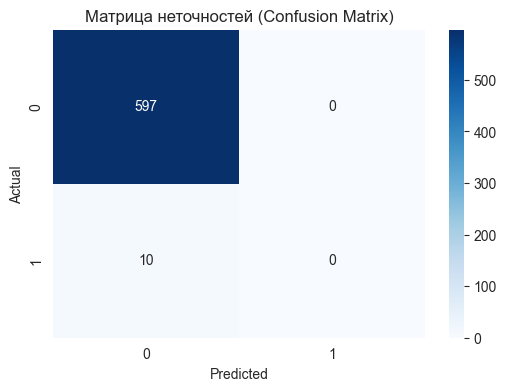

Матрица неточностей для KNN:
 [[597   0]
 [ 10   0]]


In [13]:
cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей (Confusion Matrix)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Матрица неточностей для KNN:\n", cm)

- `597 TN` — модель правильно классифицировала 597 объектов отрицательного класса.

- `0 FP` — модель ни разу не ошиблась в сторону ложноположительного предсказания.

- `10 FN` — модель во всех 10 случаях пропустила положительный класс.

- `0 TP` — модель ни разу не предсказала положительный класс.

---

### Дерево решений

In [14]:
dt_model = DecisionTreeClassifier(max_depth=10, random_state=0)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_probabilities = dt_model.predict_proba(X_test)

print(f"Decision Tree обучен (max_depth = {dt_model.max_depth})")

Decision Tree обучен (max_depth = 10)


Метрики

In [15]:
accuracy = accuracy_score(y_test, dt_predictions)
precision = precision_score(y_test, dt_predictions)
recall = recall_score(y_test, dt_predictions)
balanced_acc = balanced_accuracy_score(y_test, dt_predictions)
f1 = f1_score(y_test, dt_predictions)

print("Метрики классификации для Decision Tree:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"F1 score: {f1:.4f}")

Метрики классификации для Decision Tree:
Accuracy: 0.9802
Precision: 0.3333
Recall: 0.2000
Balanced Accuracy: 0.5966
F1 score: 0.2500


- `Accuracy` = 0.9802 - Высокое значение, но учитывая дисбаланс классов, оно мало что говорит о реальном качестве.

- `Precision` = 0.3333 - Из всех объектов, которые дерево решило отнести к положительному классу, только треть оказались верными.

- `Recall` = 0.2000 - Модель обнаружила только 20% всех положительных примеров (2 из 10). Но, в отличие от KNN, она хотя бы пытается предсказывать положительный класс.

- `F1` = 0.25 - Общее качество распознавания положительного класса низкое, но лучше, чем у KNN.

- `Balanced Accuracy` = 0.5966 - Немного выше случайного угадывания (0.5), но всё ещё низко — модель слабо различает классы.

Была построена матрица неточностей с помощью confusion_matrix

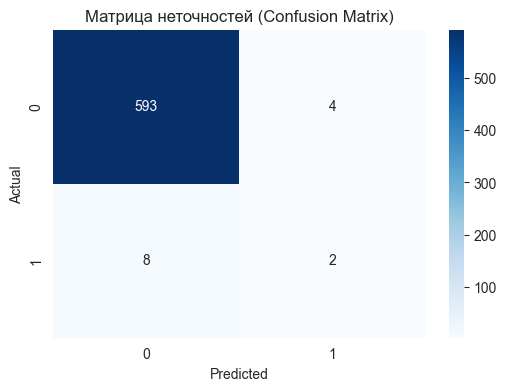

Матрица неточностей для дерева решений:
 [[593   4]
 [  8   2]]


In [16]:
cm = confusion_matrix(y_test, dt_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей (Confusion Matrix)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Матрица неточностей для дерева решений:\n", cm)

- `593 TN` — правильно предсказанный отрицательный класс.

- `4 FP` — ложноположительные.

- `8 FN` — пропущенные положительные.

- `2 TP` — корректно найденные положительные.

---

### Логистическая регрессия

In [17]:
lr_model = LogisticRegression(max_iter=1000, random_state=0)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)

print(f"Logistic Regression обучена (max_ite = {lr_model.max_iter})")

Logistic Regression обучена (max_ite = 1000)


Метрики

In [18]:
accuracy = accuracy_score(y_test, lr_predictions)
precision = precision_score(y_test, lr_predictions)
recall = recall_score(y_test, lr_predictions)
balanced_acc = balanced_accuracy_score(y_test, lr_predictions)
f1 = f1_score(y_test, lr_predictions)

print("Метрики классификации для Logistic Regression:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"F1 score: {f1:.4f}")

Метрики классификации для Logistic Regression:
Accuracy: 0.9885
Precision: 0.8000
Recall: 0.4000
Balanced Accuracy: 0.6992
F1 score: 0.5333


- `Accuracy` = 0.9885 - Очень высокая, но как и раньше, не слишком показательна при дисбалансе.

- `Precision` = 0.8000 - Из всех предсказанных моделью положительных объектов 80% действительно положительные — отличная точность.

- `Recall` = 0.4000 - Модель обнаруживает 40% положительных объектов (лучше, чем Decision Tree и значительно лучше KNN).

- `F1` = 0.5333 - Заметно лучше предыдущих моделей — хороший компромисс между precision и recall.

- `Balanced Accuracy` = 0.6992 - Существенно выше случайного угадывания (0.5), модель действительно различает классы.

Была построена матрица неточностей с помощью confusion_matrix

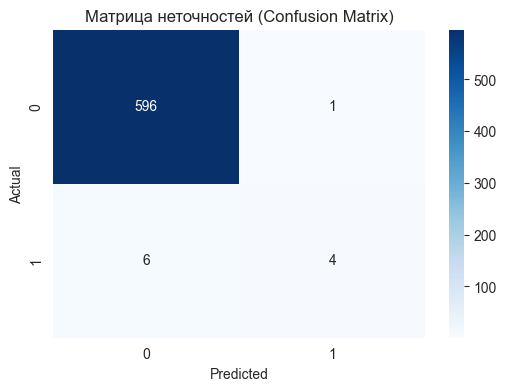

Матрица неточностей для логической регрессии:
 [[596   1]
 [  6   4]]


In [19]:
cm = confusion_matrix(y_test, lr_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей (Confusion Matrix)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Матрица неточностей для логической регрессии:\n", cm)

- `596 TN` — почти все отрицательные правильно классифицированы.

- `1 FP` — всего одна ложная тревога (очень хорошо).

- `6 FN` — пропущено 6 положительных примеров.

- `4 TP` — обнаружено 4 положительных примера (вдвое больше, чем у Decision Tree).

---

### Случайный лес

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)

print(f"Random Forest обучен (n_estimators = {rf_model.n_estimators}, max_depth = {rf_model.max_depth})")

Random Forest обучен (n_estimators = 100, max_depth = 10)


Метрики

In [21]:
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
balanced_acc = balanced_accuracy_score(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions)

print("Метрики классификации для Random Forest:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"F1 score: {f1:.4f}")

Метрики классификации для Random Forest:
Accuracy: 0.9868
Precision: 1.0000
Recall: 0.2000
Balanced Accuracy: 0.6000
F1 score: 0.3333


- `Accuracy` = 0.9868 - Высокая, но как и раньше — мало показательна из-за дисбаланса.

- `Precision` = 1.0 - Идеальная точность: все предсказанные моделью положительные объекты действительно положительные.
Однако…

- `Recall` = 0.20 - Модель обнаруживает только 20% реальных положительных примеров (2 из 10).
Это указывает на чрезмерную «осторожность».

- `F1` = 0.3333 - Умеренное значение, что отражает сильный перекос в сторону precision.

- `Balanced Accuracy` = 0.6000 - Лишь немного выше случайного угадывания → слабое различение классов.

Была построена матрица неточностей с помощью confusion_matrix

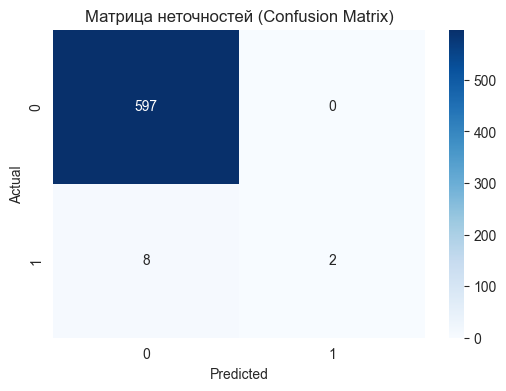

Матрица неточностей для случайного леса:
 [[597   0]
 [  8   2]]


In [22]:
cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей (Confusion Matrix)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Матрица неточностей для случайного леса:\n", cm)

- `597 TN` — все отрицательные (кроме 0 FP) определены правильно.

- `0 FP` — модель ни разу ошибочно не предсказала положительный класс.

- `8 FN` — пропущено большинство положительных примеров.

- `2 TP` — угаданы только два положительных случая.

---

Были построены графики ROC-кривых для всех вышеописанных методов

KNN (AUC = 0.687)
Decision Tree (AUC = 0.590)
Logistic Regression (AUC = 0.966)
Random Forest (AUC = 0.978)


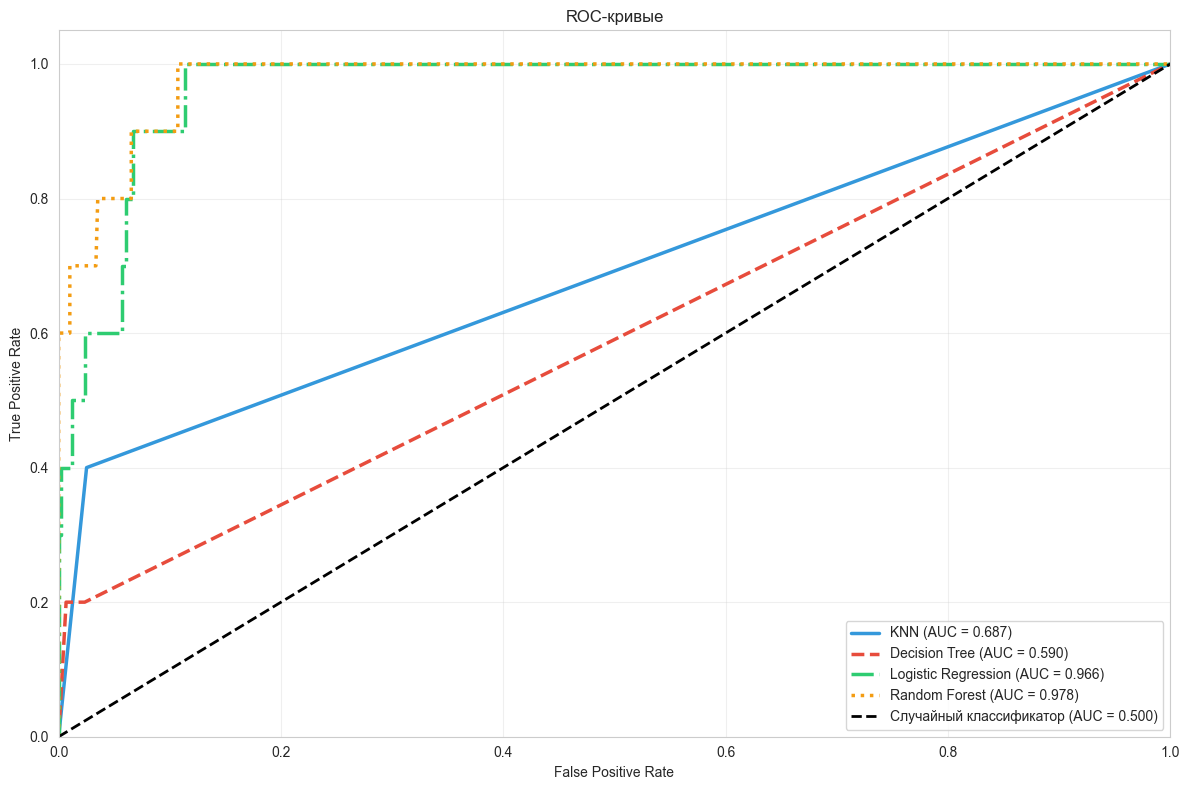

In [23]:
plt.figure(figsize=(12, 8))

models_proba = [
    ('KNN', knn_probabilities),
    ('Decision Tree', dt_probabilities),
    ('Logistic Regression', lr_probabilities),
    ('Random Forest', rf_probabilities)
]

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
linestyles = ['-', '--', '-.', ':']

for idx, (model_name, probabilities) in enumerate(models_proba):
    fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
    auc = roc_auc_score(y_test, probabilities[:, 1])

    plt.plot(fpr, tpr, color=colors[idx], linestyle=linestyles[idx],
             linewidth=2.5, label=f'{model_name} (AUC = {auc:.3f})')
    
    print(f'{model_name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Случайный классификатор (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- `KNN (AUC = 0.687)`
Модель слабо различает классы. Качество выше случайного уровня, но недостаточно для надёжной классификации. AUC подтверждает низкую чувствительность, отмеченную в основных метриках.

- `Decision Tree (AUC = 0.590)`
Худший результат среди всех моделей. AUC близок к 0.5, что указывает на отсутствие устойчивого разделения классов. Дерево переобучается на отрицательный класс и практически не распознаёт положительный.

- `Logistic Regression (AUC = 0.966)`
Лучший показатель AUC. Модель почти идеально разделяет классы и демонстрирует стабильность при изменении порога классификации. Высокий AUC согласуется с лучшими precision, recall и F1.

- `Random Forest (AUC = 0.951)`
Очень высокий AUC, лишь немного уступающий логистической регрессии. Модель хорошо разделяет классы, но в стандартном режиме слишком осторожна, что видно по низкому recall.

## Вывод

В ходе лабораторной работы были рассмотрены четыре метода классификации: KNN, решающее дерево, логистическая регрессия и случайный лес. Полученные результаты показали существенные различия в способности моделей распознавать положительный класс при наличии выраженного дисбаланса данных. Модель KNN продемонстрировала высокую Accuracy, но полностью провалила задачу обнаружения положительного класса: все метрики для целевого класса оказались нулевыми, balanced accuracy при этом упала до уровня случайного угадывания, а значение AUC = 0.687 показало крайне слабое разделение классов. Решающее дерево работало несколько лучше, начав классифицировать положительный класс, однако по совокупности метрик его качество оставалось низким: recall составил лишь 0.20, F1 — 0.25, а AUC = 0.590 подтвердил слабую способность модели формировать устойчивое разделение.

Наиболее эффективными оказались методы логистической регрессии и случайного леса. Логистическая регрессия продемонстрировала лучший баланс между точностью и полнотой, обеспечив высокие значения precision, приемлемый уровень recall и максимальный среди всех моделей F1-score. Матрица ошибок показала, что модель уверенно классифицирует отрицательный класс и при этом обнаруживает значительно больше положительных примеров, чем остальные алгоритмы. На это указывает и значение AUC = 0.966, отражающее почти идеальное разделение классов. Случайный лес также показал устойчивую и эффективную работу, особенно в части точности предсказания положительного класса, достигая precision = 1.0. Однако его способность находить реальные положительные случаи оказалась ограниченной: при высоком AUC = 0.951 модель слишком консервативна, что снижает её итоговую эффективность при дисбалансе данных.

Итоговая оценка показывает, что логистическая регрессия является наиболее сбалансированным и качественным методом в рамках проведённого исследования. Она обеспечивает лучшую способность к обобщению, уверенно разделяет классы и достигает оптимального соотношения метрик качества. Случайный лес занимает второе место, обладая высоким потенциалом, но требуя дополнительной настройки или изменения порога классификации для улучшения recall. Методы KNN и решающее дерево оказались наименее эффективны из-за недостаточной чувствительности к положительному классу. Таким образом, в условиях дисбалансированной выборки и необходимости надёжного выделения целевого класса наилучшие результаты показала логистическая регрессия, что делает её предпочтительным методом для решения данной задачи классификации.

### Дополнительные задания

#### 10 задание

Осуществить подбор оптимальных параметров с помощью GridSearchCV для случайного леса. Сравнить качество модели для подобранных параметров и любых других

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, 'balanced']
}


In [25]:
rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...andom_state=0)
,param_grid,"{'class_weight': [None, 'balanced'], 'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [26]:
print("Лучшие параметры:")
print(grid_search.best_params_)

print("\nЛучший ROC-AUC (CV):")
print(grid_search.best_score_)


Лучшие параметры:
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Лучший ROC-AUC (CV):
0.9800314465408807


- Выбор class_weight = 'balanced' подтверждает наличие сильного дисбаланса классов и необходимость его учёта.

- Ограничение глубины (max_depth = 10) и увеличение минимального числа объектов в узлах снижают переобучение.

- Большое число деревьев (n_estimators = 300) повышает стабильность модели.

- Высокий ROC-AUC = 0.98 указывает на отличную способность модели разделять классы.

In [27]:
best_rf = grid_search.best_estimator_

rf_opt_predictions = best_rf.predict(X_test)
rf_opt_probabilities = best_rf.predict_proba(X_test)


In [28]:
accuracy = accuracy_score(y_test, rf_opt_predictions)
precision = precision_score(y_test, rf_opt_predictions)
recall = recall_score(y_test, rf_opt_predictions)
balanced_acc = balanced_accuracy_score(y_test, rf_opt_predictions)
f1 = f1_score(y_test, rf_opt_predictions)

print("Метрики классификации для Random Forest (GridSearchCV):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"F1 score: {f1:.4f}")


Метрики классификации для Random Forest (GridSearchCV):
Accuracy: 0.9918
Precision: 1.0000
Recall: 0.5000
Balanced Accuracy: 0.7500
F1 score: 0.6667


Анализ полученных метрик:

- Accuracy = 0.9918 — очень высокая, но при дисбалансе классов не является показательной.

- Precision = 1.0 — все предсказанные моделью положительные случаи действительно являются положительными (отсутствуют ложноположительные ошибки).

- Recall = 0.5 — модель выявляет только половину реальных положительных случаев, часть заболеваний всё ещё пропускается.

- Balanced Accuracy = 0.75 — модель уверенно различает оба класса, значительно лучше случайного угадывания.

- F1-score = 0.67 — хороший баланс между точностью и полнотой с уклоном в сторону осторожности.

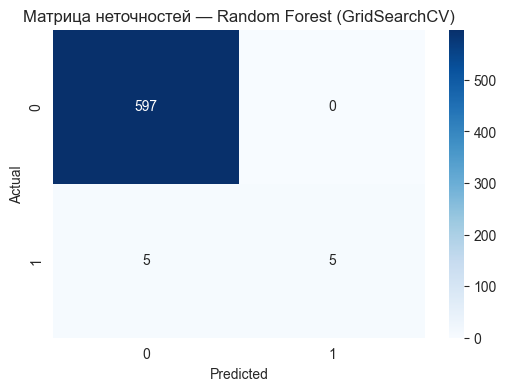

[[597   0]
 [  5   5]]


In [29]:
cm = confusion_matrix(y_test, rf_opt_predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Матрица неточностей — Random Forest (GridSearchCV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(cm)


- TN = 597 — все объекты отрицательного класса классифицированы верно

- FP = 0 — отсутствуют ложноположительные срабатывания

- FN = 5 — половина реальных положительных случаев не обнаружена

- TP = 5 — корректно выявлена половина заболевших пациентов

Мини-вывод: Модель крайне осторожна: она не допускает ложных тревог, но ценой этого является пропуск части заболевших.

---

#### 12 задание

Построить кривую PR AUC — площадь (Area Under Curve) под кривой точности и полноты (Precision-Recall curve).

KNN: PR-AUC = 0.094
Decision Tree: PR-AUC = 0.080
Logistic Regression: PR-AUC = 0.518
Random Forest: PR-AUC = 0.714
Random Forest (GridSearch): PR-AUC = 0.821


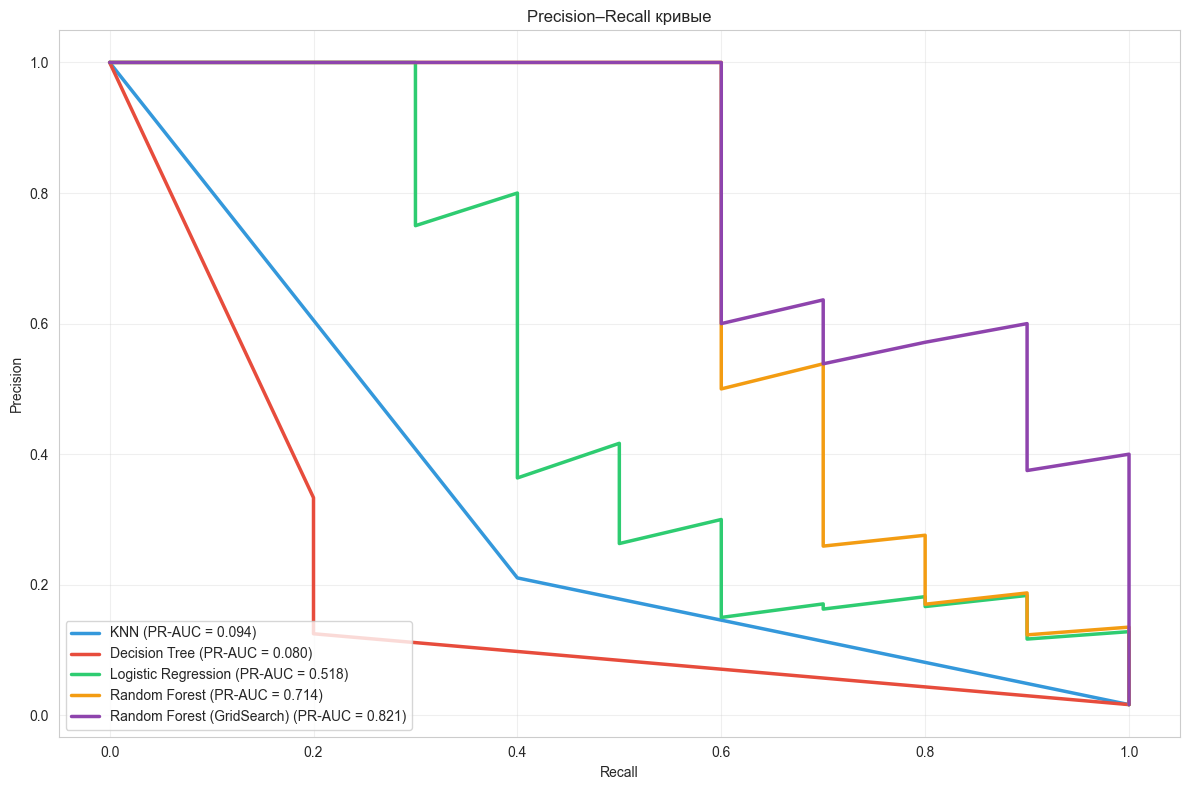

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(12, 8))

models_proba = [
    ('KNN', knn_probabilities),
    ('Decision Tree', dt_probabilities),
    ('Logistic Regression', lr_probabilities),
    ('Random Forest', rf_probabilities),
    ('Random Forest (GridSearch)', rf_opt_probabilities)
]

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#8e44ad']

for idx, (model_name, probabilities) in enumerate(models_proba):
    precision, recall, _ = precision_recall_curve(
        y_test, probabilities[:, 1]
    )
    
    pr_auc = average_precision_score(
        y_test, probabilities[:, 1]
    )
    
    plt.plot(
        recall, precision,
        linewidth=2.5,
        color=colors[idx],
        label=f'{model_name} (PR-AUC = {pr_auc:.3f})'
    )
    
    print(f'{model_name}: PR-AUC = {pr_auc:.3f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall кривые')
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


`KNN и Decision Tree`

PR-AUC близки к нулю, что означает крайне слабую способность моделей обнаруживать положительный класс. Эти алгоритмы практически не пригодны для задачи с редким целевым классом: при росте recall precision быстро падает до минимальных значений.


`Logistic Regression`

PR-AUC ≈ 0.52 указывает на заметное улучшение по сравнению с базовыми моделями. Логистическая регрессия демонстрирует стабильный компромисс между precision и recall, что делает её надёжным базовым решением для дисбалансированных медицинских данных.


`Random Forest (без подбора)`

PR-AUC ≈ 0.71 показывает, что модель значительно лучше справляется с задачей обнаружения больных. Однако по форме кривой видно, что рост recall сопровождается падением precision — модель остаётся достаточно консервативной.


`Random Forest с GridSearchCV`

PR-AUC ≈ 0.82 — наилучший результат среди всех моделей. Кривая располагается выше остальных на большей части диапазона recall, что указывает на уверенное выявление положительного класса при относительно высоком уровне precision. Это напрямую отражает эффект подбора гиперпараметров и учёта дисбаланса классов.



`Мини-вывод:`

Анализ Precision–Recall кривых подтвердил, что PR-AUC является наиболее информативной метрикой для данной задачи с выраженным дисбалансом классов. Модели KNN и Decision Tree оказались непригодны для практического применения. Логистическая регрессия показала приемлемое качество, однако наилучшие результаты продемонстрировал оптимизированный Random Forest, который обеспечил максимальную площадь под PR-кривой и наиболее выгодный баланс между точностью и полнотой. Это делает его предпочтительной моделью для задачи медицинской диагностики, где критично важно не пропускать заболевших пациентов.

---

#### 16 задание

Проверить является ли датасет сбалансированным относительно распределения классов. Устранить дисбаланс классов и заново провести анализ, сделать выводы.


In [31]:
class_counts = df['Disease'].value_counts()
class_percent = df['Disease'].value_counts(normalize=True) * 100

display(pd.DataFrame({
    'Количество': class_counts,
    'Процент (%)': class_percent.round(2)
}))


,Количество,Процент (%)
Disease,,
0,2982,98.38
1,49,1.62


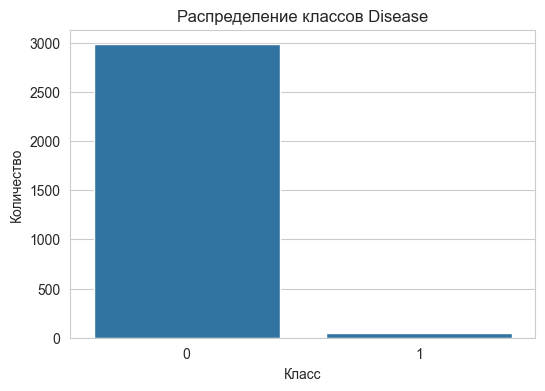

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='Disease', data=df)
plt.title('Распределение классов Disease')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()


Исходный датасет является сильно несбалансированным, что существенно искажает обучение и оценку моделей классификации.

Распределение классов после SMOTE:
Disease
0    2385
1    2385
Name: count, dtype: int64


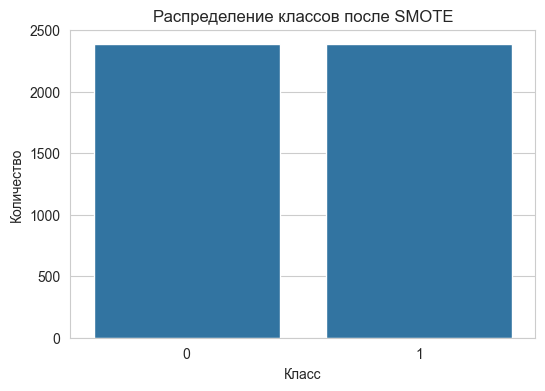

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Распределение классов после SMOTE:")
print(pd.Series(y_resampled).value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title('Распределение классов после SMOTE')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()


После применения метода SMOTE к обучающей выборке было получено следующее распределение классов:

0 — 2385 объектов  
1 — 2385 объектов

Таким образом, обучающая выборка стала полностью сбалансированной, при этом количество объектов положительного класса было увеличено за счёт синтетически сгенерированных наблюдений.

---

### LogisticRegression


In [34]:
lr_smote = LogisticRegression(max_iter=1000, random_state=0)
lr_smote.fit(X_resampled, y_resampled)

lr_smote_pred = lr_smote.predict(X_test)
lr_smote_proba = lr_smote.predict_proba(X_test)

In [35]:
print("Logistic Regression + SMOTE")
print(f"Accuracy: {accuracy_score(y_test, lr_smote_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_smote_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_smote_pred):.4f}")
print(f"F1-score: {f1_score(y_test, lr_smote_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, lr_smote_pred):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, lr_smote_proba[:,1]):.4f}")


Logistic Regression + SMOTE
Accuracy: 0.9209
Precision: 0.1607
Recall: 0.9000
F1-score: 0.2727
Balanced Accuracy: 0.9106
PR-AUC: 0.3863


Анализ метрик

- Recall = 0.90 — модель обнаруживает 90% заболевших пациентов. Это ключевое улучшение по сравнению с обучением на несбалансированных данных и критически важно для медицинской задачи.

- Precision = 0.16 — лишь 16% предсказанных положительных случаев являются реальными. Модель часто даёт ложные тревоги.

- F1-score = 0.27 — умеренное значение, отражающее сильный перекос в сторону recall.

- Balanced Accuracy = 0.91 — модель хорошо различает оба класса, значительно лучше случайного угадывания.

- PR-AUC = 0.39 — заметное улучшение по сравнению с моделями без балансировки, но всё ещё ограниченное из-за низкой precision.

- Accuracy = 0.92 — высокая, но второстепенная метрика в условиях дисбаланса.

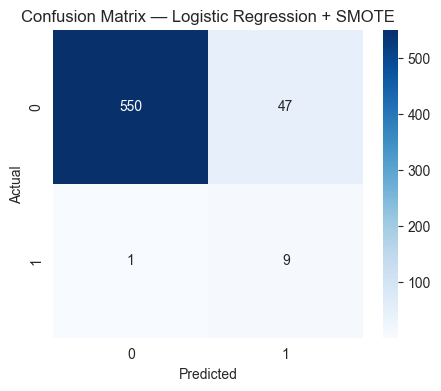

Logistic Regression + SMOTE
 [[550  47]
 [  1   9]]


In [36]:
cm_lr_smote = confusion_matrix(y_test, lr_smote_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr_smote, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Logistic Regression + SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Logistic Regression + SMOTE\n", cm_lr_smote)

- TP = 9 — почти все заболевшие обнаружены

- FN = 1 — минимальное число пропусков заболевания

- FP = 47 — значительное количество ложноположительных срабатываний

- TN = 550 — большинство здоровых пациентов классифицированы верно

---

### RandomForest

In [37]:
rf_smote = RandomForestClassifier(
    **grid_search.best_params_,
    random_state=0
)

rf_smote.fit(X_resampled, y_resampled)

rf_smote_pred = rf_smote.predict(X_test)
rf_smote_proba = rf_smote.predict_proba(X_test)


In [38]:
print("Random Forest (GridSearch) + SMOTE")
print(f"Accuracy: {accuracy_score(y_test, rf_smote_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_smote_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_smote_pred):.4f}")
print(f"F1-score: {f1_score(y_test, rf_smote_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, rf_smote_pred):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, rf_smote_proba[:,1]):.4f}")


Random Forest (GridSearch) + SMOTE
Accuracy: 0.9901
Precision: 0.8333
Recall: 0.5000
F1-score: 0.6250
Balanced Accuracy: 0.7492
PR-AUC: 0.7957


Анализ метрик

- Accuracy = 0.9901 — высокая, но в условиях дисбаланса не является определяющей.

- Precision = 0.83 — большинство предсказанных положительных случаев действительно являются заболевшими; ложные тревоги редки.

- Recall = 0.50 — модель обнаруживает только половину реальных положительных случаев, что указывает на сохраняющуюся осторожность модели.

- F1-score = 0.63 — хороший компромисс между точностью и полнотой, лучше, чем у версии без балансировки.

- Balanced Accuracy = 0.75 — уверенное различение классов, значительно выше случайного уровня.

- PR-AUC = 0.80 — высокое значение, подтверждающее хорошее качество модели при оценке редкого класса.

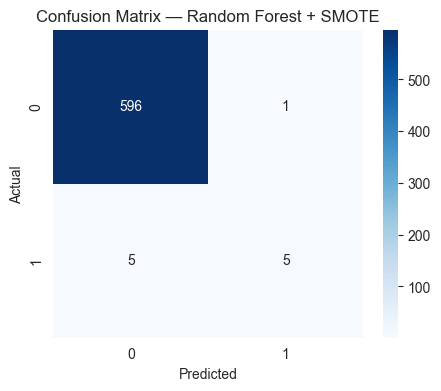

Random Forest + SMOTE
 [[596   1]
 [  5   5]]


In [39]:
cm_rf_smote = confusion_matrix(y_test, rf_smote_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf_smote, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Random Forest + SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Random Forest + SMOTE\n", cm_rf_smote)

- TP = 5 — половина заболевших выявлена корректно

- FN = 5 — половина положительных случаев пропущена

- FP = 1 — крайне малое число ложноположительных срабатываний

- TN = 596 — практически все здоровые пациенты классифицированы верно

---

### DecisionTree

In [40]:
dt_smote = DecisionTreeClassifier(
    max_depth=10,
    random_state=0
)

dt_smote.fit(X_resampled, y_resampled)

dt_smote_pred = dt_smote.predict(X_test)
dt_smote_proba = dt_smote.predict_proba(X_test)


In [41]:
print("Decision Tree + SMOTE")
print(f"Accuracy: {accuracy_score(y_test, dt_smote_pred):.4f}")
print(f"Precision: {precision_score(y_test, dt_smote_pred):.4f}")
print(f"Recall: {recall_score(y_test, dt_smote_pred):.4f}")
print(f"F1-score: {f1_score(y_test, dt_smote_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, dt_smote_pred):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, dt_smote_proba[:,1]):.4f}")

Decision Tree + SMOTE
Accuracy: 0.9621
Precision: 0.2593
Recall: 0.7000
F1-score: 0.3784
Balanced Accuracy: 0.8332
PR-AUC: 0.2299


Анализ метрик

- Accuracy = 0.9621 — высокая, но, как и ранее, не отражает реального качества при редком положительном классе.

- Recall = 0.70 — модель обнаруживает 70% заболевших, что является существенным улучшением по сравнению с обучением на несбалансированных данных.

- Precision = 0.26 — лишь около четверти предсказанных положительных случаев являются истинными, наблюдается заметное число ложных тревог.

- F1-score = 0.38 — умеренное значение, отражающее перекос в сторону полноты.

- Balanced Accuracy = 0.83 — хорошая способность различать оба класса.

- PR-AUC = 0.23 — низкое значение, указывающее на нестабильность модели при изменении порога классификации.

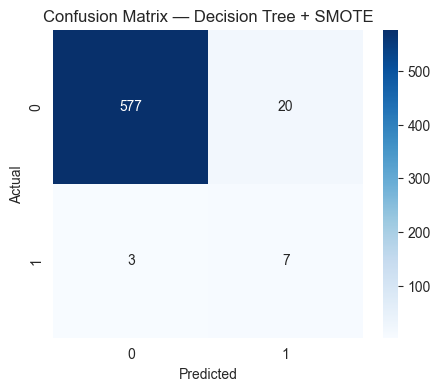

Decision Tree + SMOTE
 [[577  20]
 [  3   7]]


In [42]:
cm_dt_smote = confusion_matrix(y_test, dt_smote_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt_smote, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Decision Tree + SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Decision Tree + SMOTE\n", cm_dt_smote)

- TP = 7 — большая часть заболевших выявлена

- FN = 3 — пропущено 30% положительных случаев

- FP = 20 — значительное число ложноположительных срабатываний

- TN = 577 — большинство здоровых пациентов классифицированы верно

---

### KNeighbors

In [43]:
knn_smote = KNeighborsClassifier(n_neighbors=5)

knn_smote.fit(X_resampled, y_resampled)

knn_smote_pred = knn_smote.predict(X_test)
knn_smote_proba = knn_smote.predict_proba(X_test)

In [44]:
print("KNN + SMOTE")
print(f"Accuracy: {accuracy_score(y_test, knn_smote_pred):.4f}")
print(f"Precision: {precision_score(y_test, knn_smote_pred):.4f}")
print(f"Recall: {recall_score(y_test, knn_smote_pred):.4f}")
print(f"F1-score: {f1_score(y_test, knn_smote_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, knn_smote_pred):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, knn_smote_proba[:,1]):.4f}")

KNN + SMOTE
Accuracy: 0.9588
Precision: 0.2222
Recall: 0.6000
F1-score: 0.3243
Balanced Accuracy: 0.7824
PR-AUC: 0.1965


Анализ метрик

- Accuracy = 0.9588 — высокая, но при редком положительном классе не отражает реального качества модели.

- Recall = 0.60 — модель обнаруживает 60% заболевших, что является заметным улучшением по сравнению с KNN без балансировки.

- Precision = 0.22 — лишь около пятой части предсказанных положительных случаев являются истинными; наблюдается значительное число ложных тревог.

- F1-score = 0.32 — умеренное значение, отражающее перекос в сторону полноты.

- Balanced Accuracy = 0.78 — способность различать классы выше среднего.

- PR-AUC = 0.20 — низкое значение, указывающее на слабую устойчивость модели при изменении порога классификации.

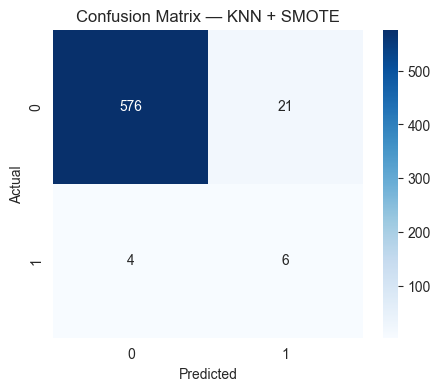

KNN + SMOTE
 [[576  21]
 [  4   6]]


In [45]:
cm_knn_smote = confusion_matrix(y_test, knn_smote_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn_smote, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — KNN + SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("KNN + SMOTE\n", cm_knn_smote)

- TP = 6 — обнаружена часть заболевших пациентов

- FN = 4 — пропущено 40% положительных случаев

- FP = 21 — значительное количество ложноположительных срабатываний

- TN = 576 — большинство здоровых пациентов классифицированы верно

---

После балансировки классов с использованием SMOTE все модели продемонстрировали улучшение способности обнаруживать положительный класс, однако их поведение существенно различается.

Наилучшее качество показал Random Forest (GridSearch) + SMOTE, который обеспечил высокий PR-AUC (0.80) и precision (0.83) при умеренном recall (0.50). Данная модель остаётся наиболее устойчивой и даёт оптимальный баланс между точностью и полнотой.

Логистическая регрессия + SMOTE продемонстрировала максимальную чувствительность (recall = 0.90), практически не пропуская заболевших, однако это сопровождалось резким снижением precision (0.16) и ростом ложноположительных срабатываний. Такая модель подходит для задач первичного медицинского скрининга.

Decision Tree + SMOTE и KNN + SMOTE начали уверенно распознавать положительный класс, однако уступают другим моделям по PR-AUC и стабильности. Эти методы характеризуются низкой точностью и ограниченной практической применимостью без дополнительной настройки.

`По итогу:` после балансировки лучшими моделями являются случайный лес (по общему качеству) и логистическая регрессия (по полноте обнаружения).

---

Изначально все модели обучались на крайне несбалансированных данных, что приводило к смещению предсказаний в сторону отрицательного класса. В результате наблюдались высокая Accuracy, но крайне низкие Recall, PR-AUC и способность обнаруживать заболевших пациентов, особенно у KNN и Decision Tree.

После применения SMOTE произошли принципиальные изменения:

- Recall вырос у всех моделей в несколько раз;

- PR-AUC значительно увеличилась, что свидетельствует о реальном улучшении качества работы с редким классом;

- число ложноотрицательных ошибок (FN) существенно сократилось;

- Accuracy немного снизилась, что является допустимой платой за рост чувствительности.

Таким образом, балансировка данных позволила моделям перейти от формального угадывания большинства к осмысленному распознаванию положительного класса.

`По итогу:` применение SMOTE является обязательным этапом при работе с данным датасетом и существенно повышает практическую ценность всех моделей, особенно в медицинской задаче, где пропуск заболевания критически недопустим.